In [1]:
#Meir's Notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from yellowbrick.regressor import ResidualsPlot
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

In [3]:
# Reading in the data set into varialbe housing_df and changing the 2nd column into datetime
housing_df = pd.read_csv('./data/kc_house_data.csv', parse_dates=[1])

In [4]:
# Looking at the dataframe to see the overall data organization 
pd.set_option('display.max_columns', None)
housing_df.head()
# Decided to keep id column for future reference, in case of new data addition, as well as checking for duplicates. 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Checking data type of each column
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking to see if any columns have NaN values
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
((housing_df.view.isna().sum())/(len(housing_df.view))) * 100

0.29170718155299347

In [9]:
((housing_df.yr_renovated.isna().sum())/((len(housing_df.yr_renovated)))) * 100

17.78950780200954

In [10]:
ren_col = housing_df[['yr_renovated']]
imputer = SimpleImputer(strategy='constant', fill_value = 0)
imputer.fit(ren_col)
ren_imputed = imputer.transform(ren_col)
housing_df.yr_renovated = ren_imputed

In [11]:
((housing_df.waterfront.isna().sum())/(len(housing_df.waterfront))) * 100

11.00152798999861

In [12]:
#Deal with duplicated `id`
#Add `resold_id` column, where first occurrence = 0 and later occurrences = 1

In [13]:
housing_df['grade'] = housing_df['grade'].str[0:2].str.strip().astype(int)

In [14]:
#dict_replace = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
#housing_df['condition'] = housing_df['condition'].replace(dict_replace)

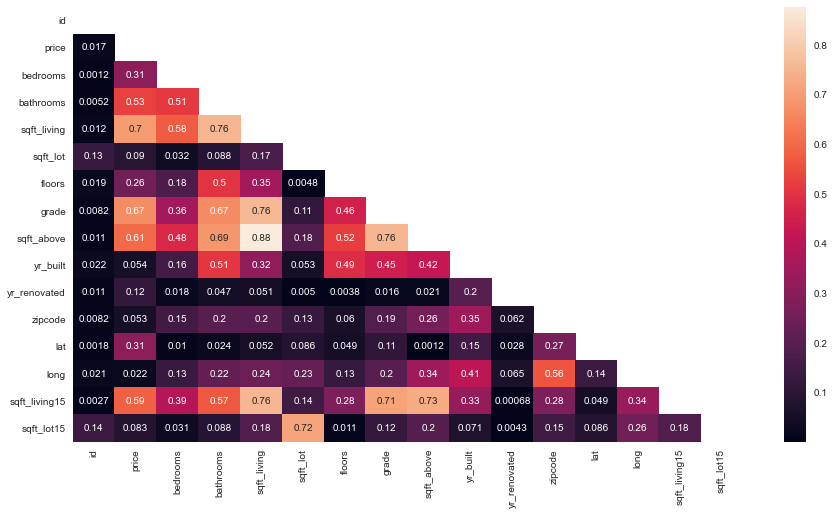

In [15]:
corr = abs(housing_df.corr())
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

# We can see that sqft_above is collinear with sqft_living. 
# That's why we can replace sqft_above with boolean for new column 'basement'
# We also see collinearity between sqft_living and grade. square footage is numeric and continuous,
# easier to use than grade. We can drop grade.
# sqft_living is highest correlation to price 

In [16]:
# Age of home when sold
housing_df['year_sold'] = housing_df['date'].dt.year
housing_df['age_when_sold'] = housing_df['year_sold'] - housing_df['yr_built']

In [17]:
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['basement'] = housing_df['sqft_basement'].map(lambda x: True if x > 0 else False)
housing_df['basement'] = housing_df['basement'].astype(int)

In [18]:
numerical_df = housing_df[['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'age_when_sold' ]]

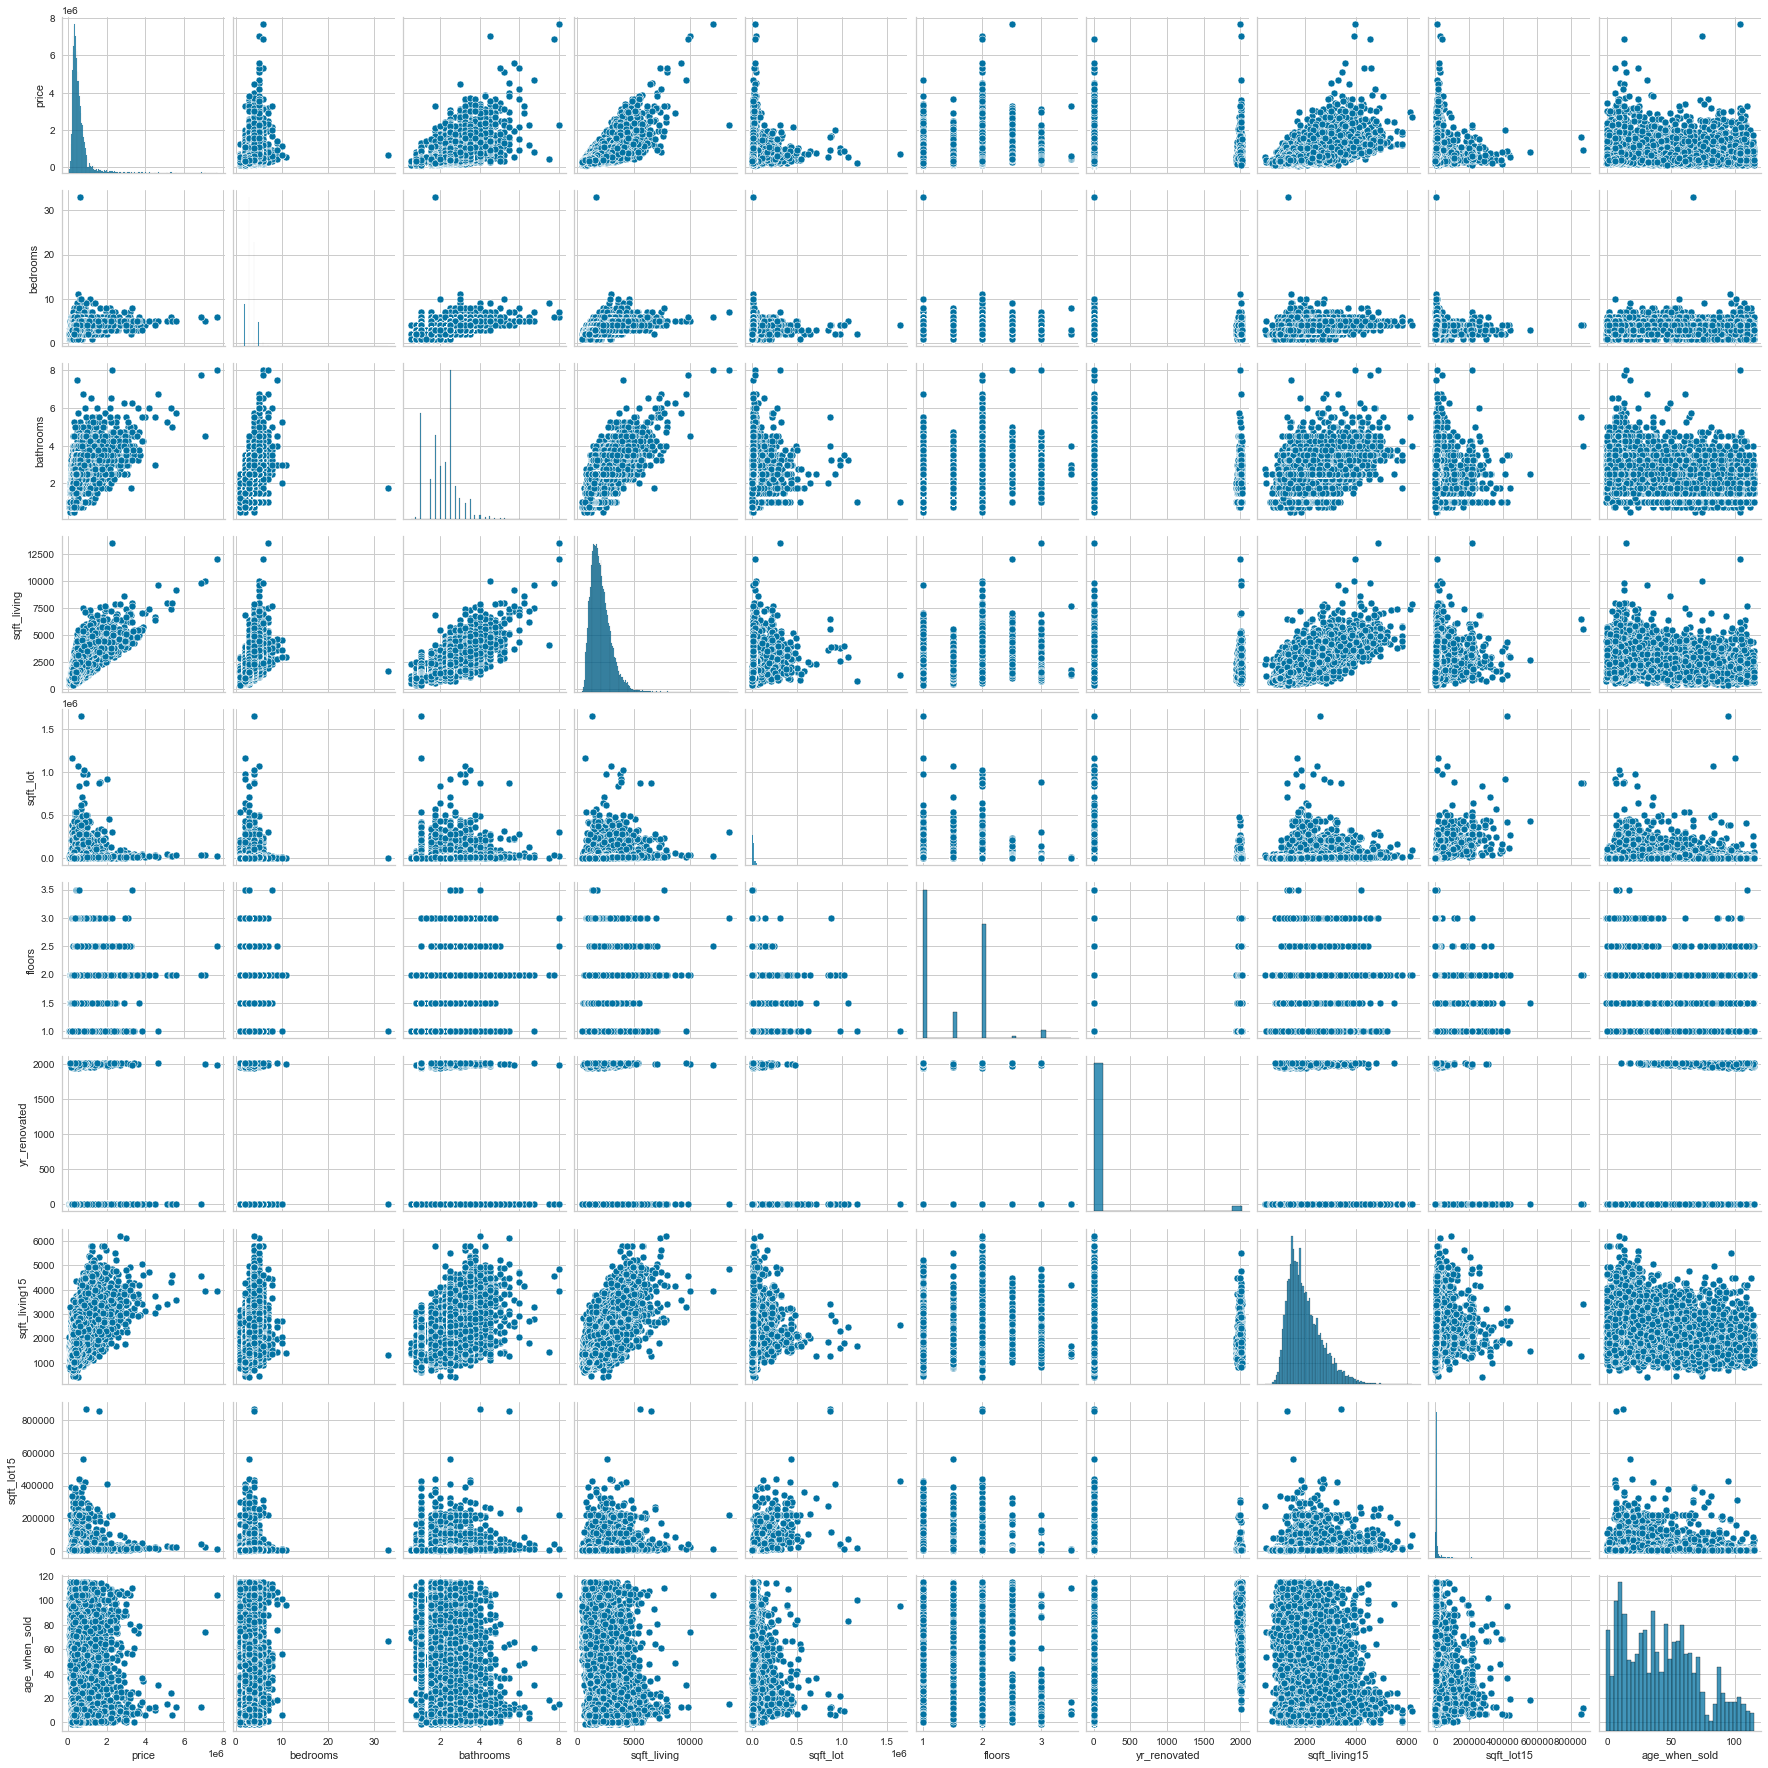

In [19]:
sns.pairplot(numerical_df)

In [20]:
# dropping numerical values that don't show linearity, as well as extraneous columns based on data processing above.
housing_df_clean = housing_df.drop(['id','date', 'sqft_lot15', 'sqft_lot', 'floors', 'grade','sqft_basement','sqft_above','yr_built', 'year_sold', 'yr_renovated', 'lat', 'long', 'age_when_sold'], axis=1)
housing_df_clean

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,zipcode,sqft_living15,basement
0,221900.0,3,1.00,1180,NaN,NONE,Average,98178,1340,0
1,538000.0,3,2.25,2570,NO,NONE,Average,98125,1690,1
2,180000.0,2,1.00,770,NO,NONE,Average,98028,2720,0
3,604000.0,4,3.00,1960,NO,NONE,Very Good,98136,1360,1
4,510000.0,3,2.00,1680,NO,NONE,Average,98074,1800,0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,NO,NONE,Average,98103,1530,0
21593,400000.0,4,2.50,2310,NO,NONE,Average,98146,1830,0
21594,402101.0,2,0.75,1020,NO,NONE,Average,98144,1020,0
21595,400000.0,3,2.50,1600,NaN,NONE,Average,98027,1410,0


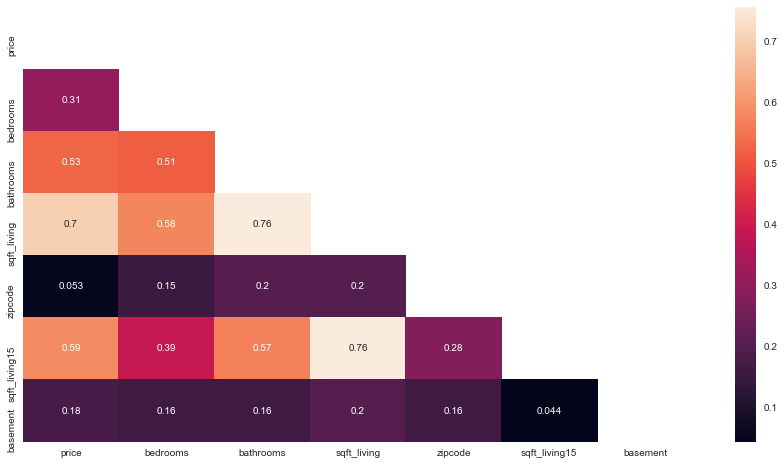

In [21]:
corr = abs(housing_df_clean.corr())
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

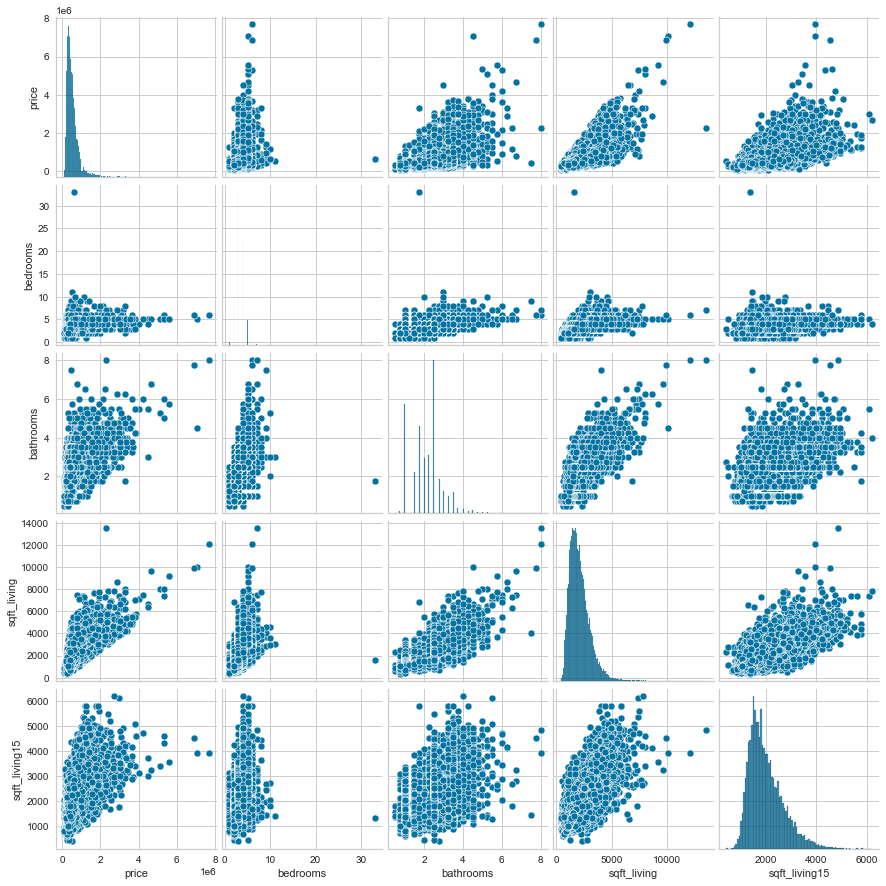

In [22]:
numerical_after_drop_df = housing_df_clean.drop(['waterfront', 'view', 'condition', 'zipcode', 'basement'], axis=1)
sns.pairplot(numerical_after_drop_df)

In [23]:
#start talking about pairplot interpretation here
# we can see how bedrooms has a minimal linear relationship to price. 
# let's keep it in for now, until we run a moedl and find the best coefficients. 

In [24]:
housing_df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,zipcode,sqft_living15,basement
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,98077.951845,1986.620318,0.392971
std,3.673681e+05,0.926299,0.768984,918.106125,53.513072,685.230472,0.488422
min,7.800000e+04,1.000000,0.500000,370.000000,98001.000000,399.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,98033.000000,1490.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,98065.000000,1840.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,98118.000000,2360.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,98199.000000,6210.000000,1.000000


In [25]:
#Filtering outliers to improve correlation and model
housing_df_clean['bathrooms'] = housing_df_clean['bathrooms'][housing_df_clean['bathrooms'].between(housing_df_clean['bathrooms'].quantile(.005), housing_df_clean['bathrooms'].quantile(.995), inclusive=True)]
housing_df_clean['bedrooms'] = housing_df_clean['bedrooms'][housing_df_clean['bedrooms'].between(housing_df_clean['bedrooms'].quantile(.005), housing_df_clean['bedrooms'].quantile(.995), inclusive=True)]
housing_df_clean['sqft_living'] = housing_df_clean['sqft_living'][housing_df_clean['sqft_living'].between(housing_df_clean['sqft_living'].quantile(.005), housing_df_clean['sqft_living'].quantile(.995), inclusive=True)]

In [26]:
housing_df_clean.dropna(inplace=True)

In [27]:
X = housing_df_clean.drop(columns = 'price', axis=1)
y = housing_df_clean['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
view_col = X_train[['view']]
imputer_view = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer_view.fit(view_col)
view_imputed = imputer_view.transform(view_col)
X_train.view = view_imputed

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
view_col = X_test[['view']]
view_imputed = imputer_view.transform(view_col)
X_test.view = view_imputed

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
water_col = X_train[['waterfront']]
imputer_water = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer_water.fit(water_col)
waterfront_imputed = imputer_water.transform(water_col)
X_train.waterfront = waterfront_imputed

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
water_col = X_test[['waterfront']]
waterfront_test_imputed = imputer_water.transform(water_col)
X_test.waterfront = waterfront_test_imputed

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
#cat_cols = [c for c in housing_df_clean.columns if housing_df_clean[c].dtype == 'O']
cat_cols = [ 'waterfront', 'view', 'condition', 'zipcode']
cat_cols

['waterfront', 'view', 'condition', 'zipcode']

In [34]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
waterfront       0
view             0
condition        0
zipcode          0
sqft_living15    0
basement         0
dtype: int64

In [35]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [36]:
X_train_enc = pd.DataFrame(X_train_enc.todense(), columns= ct.get_feature_names())
X_train_enc.head()

,ohe__x0_YES,ohe__x1_EXCELLENT,ohe__x1_FAIR,ohe__x1_GOOD,ohe__x1_NONE,ohe__x2_Fair,ohe__x2_Good,ohe__x2_Poor,ohe__x2_Very Good,ohe__x3_98002,ohe__x3_98003,ohe__x3_98004,ohe__x3_98005,ohe__x3_98006,ohe__x3_98007,ohe__x3_98008,ohe__x3_98010,ohe__x3_98011,ohe__x3_98014,ohe__x3_98019,ohe__x3_98022,ohe__x3_98023,ohe__x3_98024,ohe__x3_98027,ohe__x3_98028,ohe__x3_98029,ohe__x3_98030,ohe__x3_98031,ohe__x3_98032,ohe__x3_98033,ohe__x3_98034,ohe__x3_98038,ohe__x3_98039,ohe__x3_98040,ohe__x3_98042,ohe__x3_98045,ohe__x3_98052,ohe__x3_98053,ohe__x3_98055,ohe__x3_98056,ohe__x3_98058,ohe__x3_98059,ohe__x3_98065,ohe__x3_98070,ohe__x3_98072,ohe__x3_98074,ohe__x3_98075,ohe__x3_98077,ohe__x3_98092,ohe__x3_98102,ohe__x3_98103,ohe__x3_98105,ohe__x3_98106,ohe__x3_98107,ohe__x3_98108,ohe__x3_98109,ohe__x3_98112,ohe__x3_98115,ohe__x3_98116,ohe__x3_98117,ohe__x3_98118,ohe__x3_98119,ohe__x3_98122,ohe__x3_98125,ohe__x3_98126,ohe__x3_98133,ohe__x3_98136,ohe__x3_98144,ohe__x3_98146,ohe__x3_98148,ohe__x3_98155,ohe__x3_98166,ohe__x3_98168,ohe__x3_98177,ohe__x3_98178,ohe__x3_98188,ohe__x3_98198,ohe__x3_98199,bedrooms,bathrooms,sqft_living,sqft_living15,basement
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.75,1990.0,1820.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.00,1410.0,1400.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.75,1350.0,1410.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.50,1550.0,1970.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.75,2990.0,2990.0,0.0


In [37]:
X_test_enc = pd.DataFrame(X_test_enc.todense(), columns= ct.get_feature_names())
X_test_enc.head()

,ohe__x0_YES,ohe__x1_EXCELLENT,ohe__x1_FAIR,ohe__x1_GOOD,ohe__x1_NONE,ohe__x2_Fair,ohe__x2_Good,ohe__x2_Poor,ohe__x2_Very Good,ohe__x3_98002,ohe__x3_98003,ohe__x3_98004,ohe__x3_98005,ohe__x3_98006,ohe__x3_98007,ohe__x3_98008,ohe__x3_98010,ohe__x3_98011,ohe__x3_98014,ohe__x3_98019,ohe__x3_98022,ohe__x3_98023,ohe__x3_98024,ohe__x3_98027,ohe__x3_98028,ohe__x3_98029,ohe__x3_98030,ohe__x3_98031,ohe__x3_98032,ohe__x3_98033,ohe__x3_98034,ohe__x3_98038,ohe__x3_98039,ohe__x3_98040,ohe__x3_98042,ohe__x3_98045,ohe__x3_98052,ohe__x3_98053,ohe__x3_98055,ohe__x3_98056,ohe__x3_98058,ohe__x3_98059,ohe__x3_98065,ohe__x3_98070,ohe__x3_98072,ohe__x3_98074,ohe__x3_98075,ohe__x3_98077,ohe__x3_98092,ohe__x3_98102,ohe__x3_98103,ohe__x3_98105,ohe__x3_98106,ohe__x3_98107,ohe__x3_98108,ohe__x3_98109,ohe__x3_98112,ohe__x3_98115,ohe__x3_98116,ohe__x3_98117,ohe__x3_98118,ohe__x3_98119,ohe__x3_98122,ohe__x3_98125,ohe__x3_98126,ohe__x3_98133,ohe__x3_98136,ohe__x3_98144,ohe__x3_98146,ohe__x3_98148,ohe__x3_98155,ohe__x3_98166,ohe__x3_98168,ohe__x3_98177,ohe__x3_98178,ohe__x3_98188,ohe__x3_98198,ohe__x3_98199,bedrooms,bathrooms,sqft_living,sqft_living15,basement
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.00,2100.0,1570.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.25,3820.0,2900.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.75,1640.0,1470.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.25,2940.0,2230.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.00,1310.0,1320.0,1.0


In [38]:
# intstantiate our scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train_enc)

# transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index ,columns= ct.get_feature_names())

In [40]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns= ct.get_feature_names())

In [41]:
view_col = X_train[['view']]
encoder_view = OrdinalEncoder(categories=[["NONE","FAIR", "AVERAGE", "GOOD", "EXCELLENT"]])
encoder_view.fit(view_col)
encoded_view = encoder_view.transform(view_col)
encoded_view = encoded_view.flatten()
X_train.view = encoded_view

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
encoder_view.categories_

[array(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], dtype=object)]

In [43]:
view_col = X_test[['view']]
encoded_view = encoder_view.transform(view_col)
encoded_view = encoded_view.flatten()
X_test.view = encoded_view

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
water_col = X_train[['waterfront']]
encoder_water = OrdinalEncoder()
encoder_water.fit(water_col)
encoded_water = encoder_water.transform(water_col)
encoded_water = encoded_water.flatten()
X_train.waterfront = encoded_water

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
water_col = X_test[['waterfront']]
encoded_water = encoder_water.transform(water_col)
encoded_water = encoded_water.flatten()
X_test.waterfront = encoded_water

/Users/meiralelov/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
cat_cols_ordinal = ['condition', 'zipcode']
cat_cols_ordinal

['condition', 'zipcode']

In [47]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols_ordinal)],
                       remainder='passthrough')
ct.fit(X_train)
X_train_ord = ct.transform(X_train)
X_test_ord = ct.transform(X_test)

In [48]:
X_train_ord = pd.DataFrame(X_train_ord.todense(), columns= ct.get_feature_names())
X_train_ord.head()

,ohe__x0_Fair,ohe__x0_Good,ohe__x0_Poor,ohe__x0_Very Good,ohe__x1_98002,ohe__x1_98003,ohe__x1_98004,ohe__x1_98005,ohe__x1_98006,ohe__x1_98007,ohe__x1_98008,ohe__x1_98010,ohe__x1_98011,ohe__x1_98014,ohe__x1_98019,ohe__x1_98022,ohe__x1_98023,ohe__x1_98024,ohe__x1_98027,ohe__x1_98028,ohe__x1_98029,ohe__x1_98030,ohe__x1_98031,ohe__x1_98032,ohe__x1_98033,ohe__x1_98034,ohe__x1_98038,ohe__x1_98039,ohe__x1_98040,ohe__x1_98042,ohe__x1_98045,ohe__x1_98052,ohe__x1_98053,ohe__x1_98055,ohe__x1_98056,ohe__x1_98058,ohe__x1_98059,ohe__x1_98065,ohe__x1_98070,ohe__x1_98072,ohe__x1_98074,ohe__x1_98075,ohe__x1_98077,ohe__x1_98092,ohe__x1_98102,ohe__x1_98103,ohe__x1_98105,ohe__x1_98106,ohe__x1_98107,ohe__x1_98108,ohe__x1_98109,ohe__x1_98112,ohe__x1_98115,ohe__x1_98116,ohe__x1_98117,ohe__x1_98118,ohe__x1_98119,ohe__x1_98122,ohe__x1_98125,ohe__x1_98126,ohe__x1_98133,ohe__x1_98136,ohe__x1_98144,ohe__x1_98146,ohe__x1_98148,ohe__x1_98155,ohe__x1_98166,ohe__x1_98168,ohe__x1_98177,ohe__x1_98178,ohe__x1_98188,ohe__x1_98198,ohe__x1_98199,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,basement
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.75,1990.0,0.0,0.0,1820.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.00,1410.0,0.0,0.0,1400.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.75,1350.0,0.0,0.0,1410.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.50,1550.0,0.0,0.0,1970.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.75,2990.0,0.0,0.0,2990.0,0.0


In [49]:
X_test_ord = pd.DataFrame(X_test_ord.todense(), columns= ct.get_feature_names())
X_test_ord.head()

,ohe__x0_Fair,ohe__x0_Good,ohe__x0_Poor,ohe__x0_Very Good,ohe__x1_98002,ohe__x1_98003,ohe__x1_98004,ohe__x1_98005,ohe__x1_98006,ohe__x1_98007,ohe__x1_98008,ohe__x1_98010,ohe__x1_98011,ohe__x1_98014,ohe__x1_98019,ohe__x1_98022,ohe__x1_98023,ohe__x1_98024,ohe__x1_98027,ohe__x1_98028,ohe__x1_98029,ohe__x1_98030,ohe__x1_98031,ohe__x1_98032,ohe__x1_98033,ohe__x1_98034,ohe__x1_98038,ohe__x1_98039,ohe__x1_98040,ohe__x1_98042,ohe__x1_98045,ohe__x1_98052,ohe__x1_98053,ohe__x1_98055,ohe__x1_98056,ohe__x1_98058,ohe__x1_98059,ohe__x1_98065,ohe__x1_98070,ohe__x1_98072,ohe__x1_98074,ohe__x1_98075,ohe__x1_98077,ohe__x1_98092,ohe__x1_98102,ohe__x1_98103,ohe__x1_98105,ohe__x1_98106,ohe__x1_98107,ohe__x1_98108,ohe__x1_98109,ohe__x1_98112,ohe__x1_98115,ohe__x1_98116,ohe__x1_98117,ohe__x1_98118,ohe__x1_98119,ohe__x1_98122,ohe__x1_98125,ohe__x1_98126,ohe__x1_98133,ohe__x1_98136,ohe__x1_98144,ohe__x1_98146,ohe__x1_98148,ohe__x1_98155,ohe__x1_98166,ohe__x1_98168,ohe__x1_98177,ohe__x1_98178,ohe__x1_98188,ohe__x1_98198,ohe__x1_98199,bedrooms,bathrooms,sqft_living,waterfront,view,sqft_living15,basement
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.00,2100.0,0.0,0.0,1570.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.25,3820.0,0.0,1.0,2900.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.75,1640.0,0.0,0.0,1470.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.25,2940.0,0.0,0.0,2230.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.00,1310.0,0.0,0.0,1320.0,1.0


In [50]:
# intstantiate our scaler
scaler = StandardScaler()

# train on train data
scaler.fit(X_train_ord)

# transform both train and test data
X_train_scaled_ord = scaler.transform(X_train_ord)
X_test_scaled_ord = scaler.transform(X_test_ord)

In [51]:
X_train_scaled_ord = pd.DataFrame(X_train_scaled_ord, index=X_train.index, columns= ct.get_feature_names())

In [52]:
X_test_scaled_ord = pd.DataFrame(X_test_scaled_ord, index=X_test.index, columns= ct.get_feature_names())

In [53]:
# function to generate error 
def res_plots(model, X_train, X_test, y_train, y_test):
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_resids = y_train - train_preds
    test_resids = y_test - test_preds
    
    durbinWatson = durbin_watson(test_resids)
    
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    
    bins = int(  len(X_test)**.5 )
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 18), nrows=3)
    sns.histplot(test_resids, bins=bins, kde=True, ax=ax1)
    sm.qqplot(test_resids, line='r', ax=ax2)
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    
    plt.show()
    print(f'R2_train: {r2_score(y_train, train_preds):.3f}'),\
    print(f'R2_test: {r2_score(y_test, test_preds):.3f}'),\
    print(f'Durbin-Watson: {durbinWatson:.3f}'),\
    print(f'Train Mean Squarred Error: {train_mse:.3f}'),\
    print(f'Test Mean Squarred Error: {test_mse:.3f}'),\
    print(f'Test RMSE: {test_rmse:.3f}')
    

In [54]:
def res_plots_log(model, X_train, X_test, y_train, y_test):
    
    train_preds = np.exp(model.predict(X_train))
    test_preds = np.exp(model.predict(X_test))
    train_resids = np.exp(y_train) - train_preds
    test_resids = np.exp(y_test) - test_preds
    
    durbinWatson = durbin_watson(test_resids)
    
    train_mse = mean_squared_error(np.exp(y_train), train_preds)
    test_mse = mean_squared_error(np.exp(y_test), test_preds)
    test_rmse = mean_squared_error(np.exp(y_test), test_preds, squared=False)
    
    bins = int(  len(X_test)**.5 )
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9, 18), nrows=3)
    sns.histplot(test_resids, bins=bins, kde=True, ax=ax1)
    sm.qqplot(test_resids, line='r', ax=ax2)
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    
    plt.show()
    print(f'R2_train: {r2_score(y_train, np.log(train_preds)):.3f}'),\
    print(f'R2_test: {r2_score(y_test, np.log(test_preds)):.3f}'),\
    print(f'Durbin-Watson: {durbinWatson:.3f}'),\
    print(f'Train Mean Squarred Error: {train_mse:.3f}'),\
    print(f'Test Mean Squarred Error: {test_mse:.3f}'),\
    print(f'Test RMSE: {test_rmse:.3f}')

In [55]:
# Setting up our dummy regressor
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.0
-0.00011378091138736224


In [56]:
# first simple model

col_use = ['sqft_living']
fsm_model = LinearRegression()
fsm_model.fit(X_train_scaled[col_use], y_train)
print(fsm_model.score(X_train_scaled[col_use], y_train))
print(fsm_model.score(X_test_scaled[col_use], y_test))

0.4434770783789924
0.45638311722154457


In [57]:
fsm_model_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled[col_use]))
fsm_model_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:04   Log-Likelihood:            -1.7429e+05
No. Observations:               12628   AIC:                         3.486e+05
Df Residuals:                   12626   BIC:                         3.486e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.298e+05   2124.396    249.392      0.000    5.26e+05    5.34e+05
sqft_living  2.131e+05   2124.396    100.306      0.000    2.09e+05    2.17e+05
==============================================================================
Omnibus:                     6363.203   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78315.138
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                      14.435   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

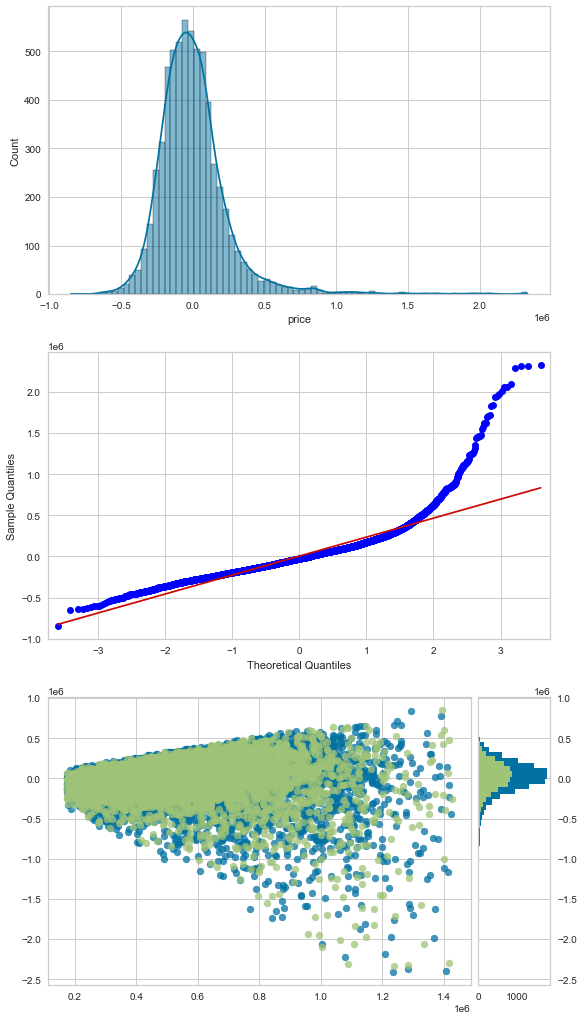

R2_train: 0.443
R2_test: 0.456
Durbin-Watson: 1.994
Train Mean Squarred Error: 56981895498.752
Test Mean Squarred Error: 63612524980.058
Test RMSE: 252215.235


In [58]:
res_plots(fsm_model, X_train_scaled[col_use], X_test_scaled[col_use], y_train, y_test)

In [59]:
# model with no encoders
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement']
mlr_1 = LinearRegression()
mlr_1.fit(X_train_scaled[col_use], y_train)
print(mlr_1.score(X_train_scaled[col_use], y_train))
print(mlr_1.score(X_test_scaled[col_use], y_test))

0.47692684780350747
0.4832364290167689


In [60]:
mlr_1_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled[col_use]))
mlr_1_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     2302.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:04   Log-Likelihood:            -1.7390e+05
No. Observations:               12628   AIC:                         3.478e+05
Df Residuals:                   12622   BIC:                         3.479e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.298e+05   2059.890    257.202      0.000    5.26e+05    5.34e+05
sqft_living    1.848e+05   4197.712     44.026      0.000    1.77e+05    1.93e+05
bedrooms      -4.634e+04   2576.804    -17.982      0.000   -5.14e+04   -4.13e+04
bathrooms      6274.4983   3064.793      2.047      0.041     267.038    1.23e+04
sqft_living15  6.146e+04   3212.188     19.134      0.000    5.52e+04    6.78e+04
basement       2.458e+04   2134.709     11.513      0.000    2.04e+04    2.88e+04
==============================================================================
Omnibus:                     6345.267   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78320.452
Skew:                           2.117   Prob(JB):                         0.00
Kurtosis:                      14.442   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

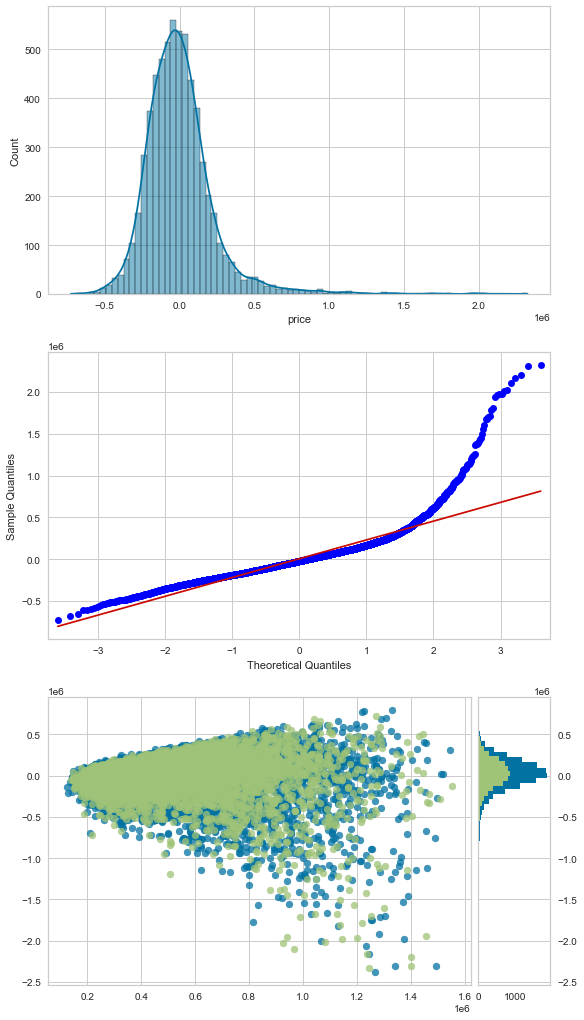

R2_train: 0.477
R2_test: 0.483
Durbin-Watson: 1.993
Train Mean Squarred Error: 53557002845.179
Test Mean Squarred Error: 60470225648.514
Test RMSE: 245906.945


In [61]:
res_plots(mlr_1, X_train_scaled[col_use], X_test_scaled[col_use], y_train, y_test)

In [62]:
#model with no encoders and log of price 
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement',]
mlr_2 = LinearRegression()
mlr_2.fit(X_train_scaled[col_use], y_train_log)
print(mlr_2.score(X_train_scaled[col_use], y_train_log))
print(mlr_2.score(X_test_scaled[col_use], y_test_log))

0.4902486235018725
0.5083867534987283


In [63]:
mlr_2_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled[col_use]))
mlr_2_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2428.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:05   Log-Likelihood:                -5083.9
No. Observations:               12628   AIC:                         1.018e+04
Df Residuals:                   12622   BIC:                         1.022e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0439      0.003   4049.176      0.000      13.038      13.050
sqft_living       0.2483      0.007     37.822      0.000       0.235       0.261
bedrooms         -0.0583      0.004    -14.461      0.000      -0.066      -0.050
bathrooms         0.0377      0.005      7.863      0.000       0.028       0.047
sqft_living15     0.1180      0.005     23.484      0.000       0.108       0.128
basement          0.0523      0.003     15.680      0.000       0.046       0.059
==============================================================================
Omnibus:                       28.195   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.582
Skew:                           0.056   Prob(JB):                     4.59e-06
Kurtosis:                       2.816   Cond. No.                         4.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

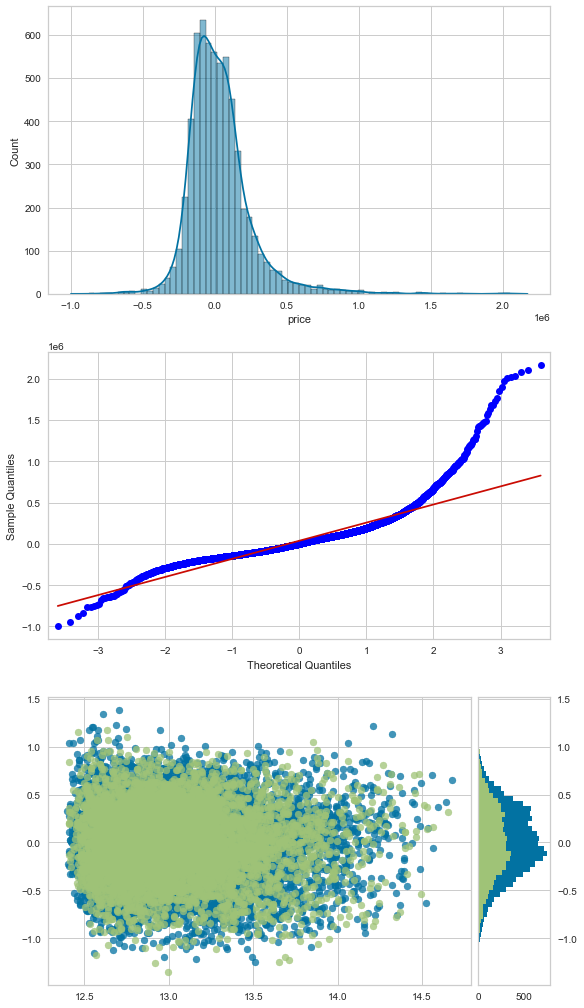

R2_train: 0.490
R2_test: 0.508
Durbin-Watson: 1.958
Train Mean Squarred Error: 52117935188.968
Test Mean Squarred Error: 59270964872.111
Test RMSE: 243456.289


In [64]:
res_plots_log(mlr_2, X_train_scaled[col_use], X_test_scaled[col_use], y_train_log, y_test_log)

In [65]:
# model with just waterfront and view ordinal encoder 
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement','view', 'waterfront']
mlr_3 = LinearRegression()
mlr_3.fit(X_train_scaled_ord[col_use], y_train)
print(mlr_3.score(X_train_scaled_ord[col_use], y_train))
print(mlr_3.score(X_test_scaled_ord[col_use], y_test))

0.5283430634944137
0.5365945488050086


In [66]:
mlr_3_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled_ord[col_use]))
mlr_3_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     2020.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:06   Log-Likelihood:            -1.7325e+05
No. Observations:               12628   AIC:                         3.465e+05
Df Residuals:                   12620   BIC:                         3.466e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.298e+05   1956.187    270.837      0.000    5.26e+05    5.34e+05
sqft_living    1.704e+05   4006.603     42.519      0.000    1.63e+05    1.78e+05
bedrooms      -3.716e+04   2459.624    -15.109      0.000    -4.2e+04   -3.23e+04
bathrooms      7546.3961   2911.440      2.592      0.010    1839.531    1.33e+04
sqft_living15  5.221e+04   3073.969     16.984      0.000    4.62e+04    5.82e+04
basement       1.638e+04   2052.366      7.979      0.000    1.24e+04    2.04e+04
view           4.988e+04   2237.219     22.298      0.000    4.55e+04    5.43e+04
waterfront     4.023e+04   2132.448     18.864      0.000     3.6e+04    4.44e+04
==============================================================================
Omnibus:                     5336.631   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53258.549
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                      12.426   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

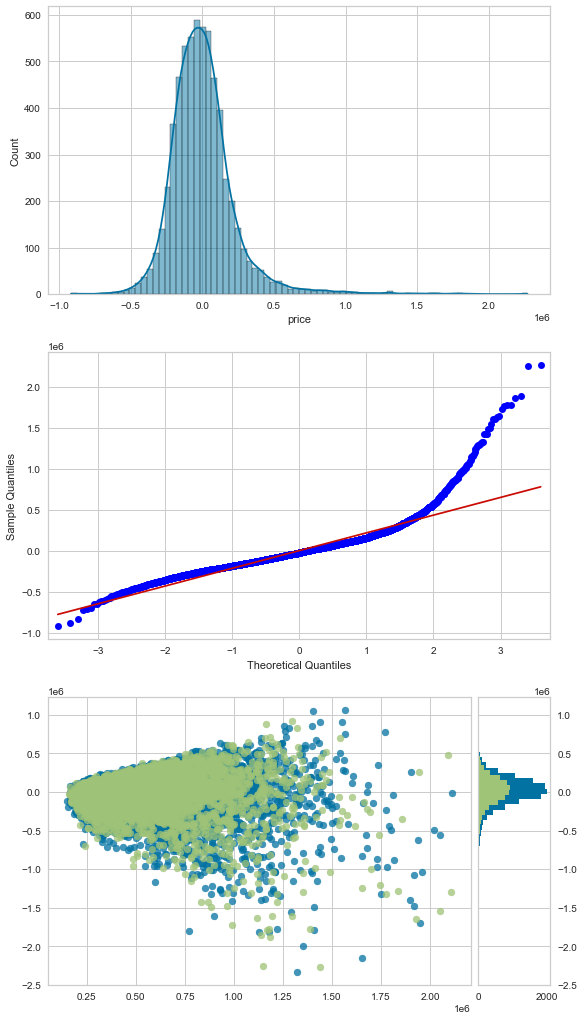

R2_train: 0.528
R2_test: 0.537
Durbin-Watson: 1.992
Train Mean Squarred Error: 48292541462.516
Test Mean Squarred Error: 54226407924.218
Test RMSE: 232865.644


In [67]:
res_plots(mlr_3, X_train_scaled_ord[col_use], X_test_scaled_ord[col_use], y_train, y_test)

In [68]:
# model with ohe 
col_use = X_train_scaled
mlr_4 = LinearRegression()
mlr_4.fit(X_train_scaled, y_train)
print(mlr_4.score(X_train_scaled, y_train))
print(mlr_4.score(X_test_scaled, y_test))

0.7989391378055755
0.7990134323617073


In [69]:
mlr_4_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled))
mlr_4_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     600.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:07   Log-Likelihood:            -1.6786e+05
No. Observations:               12628   AIC:                         3.359e+05
Df Residuals:                   12544   BIC:                         3.365e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.298e+05   1281.069    413.567      0.000    5.27e+05    5.32e+05
ohe__x0_YES        4.117e+04   1613.169     25.520      0.000     3.8e+04    4.43e+04
ohe__x1_EXCELLENT  3.019e+04   1737.438     17.377      0.000    2.68e+04    3.36e+04
ohe__x1_FAIR       2482.8729   1475.158      1.683      0.092    -408.663    5374.408
ohe__x1_GOOD       1.463e+04   1556.351      9.399      0.000    1.16e+04    1.77e+04
ohe__x1_NONE      -2.199e+04   1899.908    -11.576      0.000   -2.57e+04   -1.83e+04
ohe__x2_Fair       1008.6049   1293.606      0.780      0.436   -1527.060    3544.270
ohe__x2_Good       8665.3627   1394.197      6.215      0.000    5932.523    1.14e+04
ohe__x2_Poor      -3885.9563   1289.156     -3.014      0.003   -6412.900   -1359.013
ohe__x2_Very Good  1.648e+04   1343.080     12.269      0.000    1.38e+04    1.91e+04
ohe__x3_98002      2161.4505   1579.013      1.369      0.171    -933.657    5256.558
ohe__x3_98003      1334.3568   1688.731      0.790      0.429   -1975.815    4644.529
ohe__x3_98004      9.242e+04   1708.694     54.086      0.000    8.91e+04    9.58e+04
ohe__x3_98005      3.282e+04   1577.265     20.810      0.000    2.97e+04    3.59e+04
ohe__x3_98006      4.383e+04   1892.471     23.161      0.000    4.01e+04    4.75e+04
ohe__x3_98007      2.125e+04   1473.207     14.424      0.000    1.84e+04    2.41e+04
ohe__x3_98008      3.218e+04   1700.017     18.926      0.000    2.88e+04    3.55e+04
ohe__x3_98010      3971.6406   1430.277      2.777      0.005    1168.079    6775.202
ohe__x3_98011      1.323e+04   1598.304      8.278      0.000    1.01e+04    1.64e+04
ohe__x3_98014      7272.4652   1455.215      4.998      0.000    4420.020    1.01e+04
ohe__x3_98019      8242.7405   1579.254      5.219      0.000    5147.161    1.13e+04
ohe__x3_98022       140.4927   1609.499      0.087      0.930   -3014.372    3295.357
ohe__x3_98023     -2562.8607   1944.726     -1.318      0.188   -6374.822    1249.101
ohe__x3_98024       1.12e+04   1426.175      7.855      0.000    8407.057     1.4e+04
ohe__x3_98027      2.407e+04   1803.420     13.349      0.000    2.05e+04    2.76e+04
ohe__x3_98028      1.432e+04   1670.200      8.575      0.000     1.1e+04    1.76e+04
ohe__x3_98029      2.861e+04   1748.412     16.362      0.000    2.52e+04     3.2e+04
ohe__x3_98030       171.5558   1678.330      0.102      0.919   -3118.227    3461.339
ohe__x3_98031      2206.1217   1642.853      1.343      0.179   -1014.122    5426.366
ohe__x3_98032      1073.2551   1487.239      0.722      0.471   -1841.961    3988.471
ohe__x3_98033      5.335e+04   1857.312     28.725      0.000    4.97e+04     5.7e+04
ohe__x3_98034      3.559e+04   1967.240     18.091      0.000    3.17e+04    3.94e+04
ohe__x3_98038      3585.8360   2017.321      1.778      0.076    -368.422

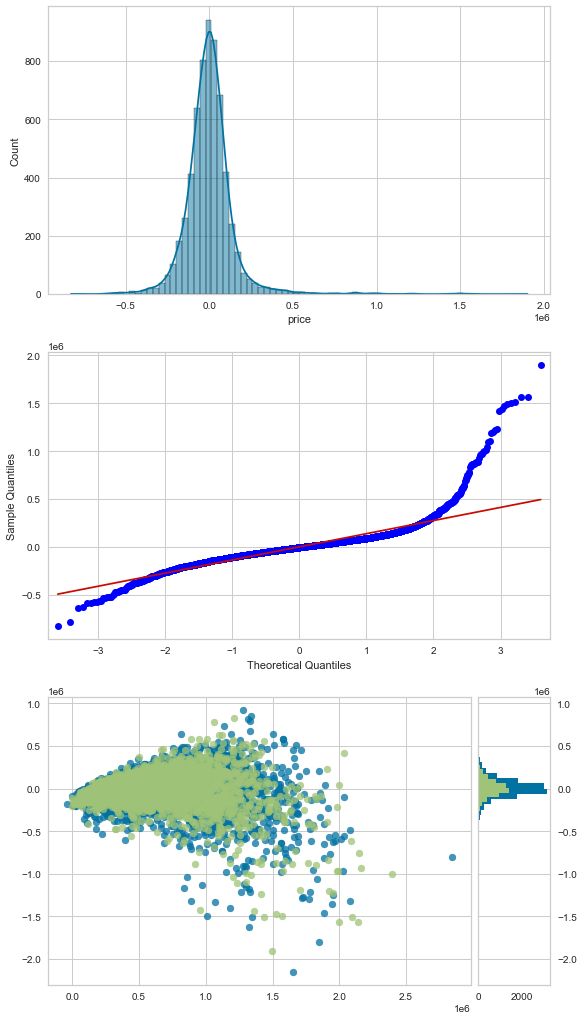

R2_train: 0.799
R2_test: 0.799
Durbin-Watson: 1.968
Train Mean Squarred Error: 20586445936.640
Test Mean Squarred Error: 23518885192.088
Test RMSE: 153358.682


In [70]:
res_plots(mlr_4, X_train_scaled, X_test_scaled, y_train, y_test)

In [71]:
# model with ohe and ordinal encoders 
col_use = X_train_scaled_ord
mlr_5 = LinearRegression()
mlr_5.fit(X_train_scaled_ord, y_train)
print(mlr_5.score(X_train_scaled_ord, y_train))
print(mlr_5.score(X_test_scaled_ord, y_test))

0.7971429232698508
0.797910582381779


In [72]:
mlr_5_ols = sm.OLS(y_train, sm.add_constant(X_train_scaled_ord))
mlr_5_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     616.3
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:08   Log-Likelihood:            -1.6792e+05
No. Observations:               12628   AIC:                         3.360e+05
Df Residuals:                   12547   BIC:                         3.366e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.298e+05   1286.625    411.781      0.000    5.27e+05    5.32e+05
ohe__x0_Fair        951.3184   1299.203      0.732      0.464   -1595.318    3497.955
ohe__x0_Good       8898.9664   1400.032      6.356      0.000    6154.689    1.16e+04
ohe__x0_Poor      -3849.1683   1294.712     -2.973      0.003   -6387.002   -1311.335
ohe__x0_Very Good  1.672e+04   1347.720     12.406      0.000    1.41e+04    1.94e+04
ohe__x1_98002      2181.7946   1585.836      1.376      0.169    -926.686    5290.275
ohe__x1_98003      1177.5184   1695.670      0.694      0.487   -2146.255    4501.292
ohe__x1_98004       9.26e+04   1714.677     54.006      0.000    8.92e+04     9.6e+04
ohe__x1_98005      3.292e+04   1583.977     20.783      0.000    2.98e+04     3.6e+04
ohe__x1_98006      4.378e+04   1900.652     23.037      0.000    4.01e+04    4.75e+04
ohe__x1_98007      2.118e+04   1479.577     14.312      0.000    1.83e+04    2.41e+04
ohe__x1_98008      3.222e+04   1707.115     18.877      0.000    2.89e+04    3.56e+04
ohe__x1_98010      3936.1603   1436.381      2.740      0.006    1120.634    6751.686
ohe__x1_98011      1.331e+04   1605.176      8.292      0.000    1.02e+04    1.65e+04
ohe__x1_98014      7059.2378   1461.365      4.831      0.000    4194.739    9923.736
ohe__x1_98019      8249.3026   1586.099      5.201      0.000    5140.305    1.14e+04
ohe__x1_98022      -486.8680   1615.292     -0.301      0.763   -3653.088    2679.352
ohe__x1_98023     -2535.3805   1953.047     -1.298      0.194   -6363.652    1292.891
ohe__x1_98024      1.102e+04   1432.246      7.691      0.000    8207.969    1.38e+04
ohe__x1_98027      2.403e+04   1811.226     13.267      0.000    2.05e+04    2.76e+04
ohe__x1_98028       1.44e+04   1677.403      8.584      0.000    1.11e+04    1.77e+04
ohe__x1_98029      2.848e+04   1755.949     16.219      0.000     2.5e+04    3.19e+04
ohe__x1_98030       183.4002   1685.606      0.109      0.913   -3120.645    3487.446
ohe__x1_98031      2205.0723   1649.976      1.336      0.181   -1029.133    5439.278
ohe__x1_98032      1105.0195   1493.669      0.740      0.459   -1822.800    4032.839
ohe__x1_98033      5.328e+04   1864.915     28.569      0.000    4.96e+04    5.69e+04
ohe__x1_98034      3.563e+04   1975.623     18.032      0.000    3.18e+04    3.95e+04
ohe__x1_98038      3654.0112   2026.045      1.804      0.071    -317.348    7625.370
ohe__x1_98039      4.619e+04   1362.681     33.893      0.000    4.35e+04    4.89e+04
ohe__x1_98040      5.692e+04   1673.617     34.010      0.000    5.36e+04    6.02e+04
ohe__x1_98042       162.6875   1989.443      0.082      0.935   -3736.925    4062.300
ohe__x1_98045      1.068e+04   1627.139      6.564      0.000    7491.455    1.39e+04
ohe__x1_98052      4.188e+04   2027.869     20.650      0.000    3.79e+04

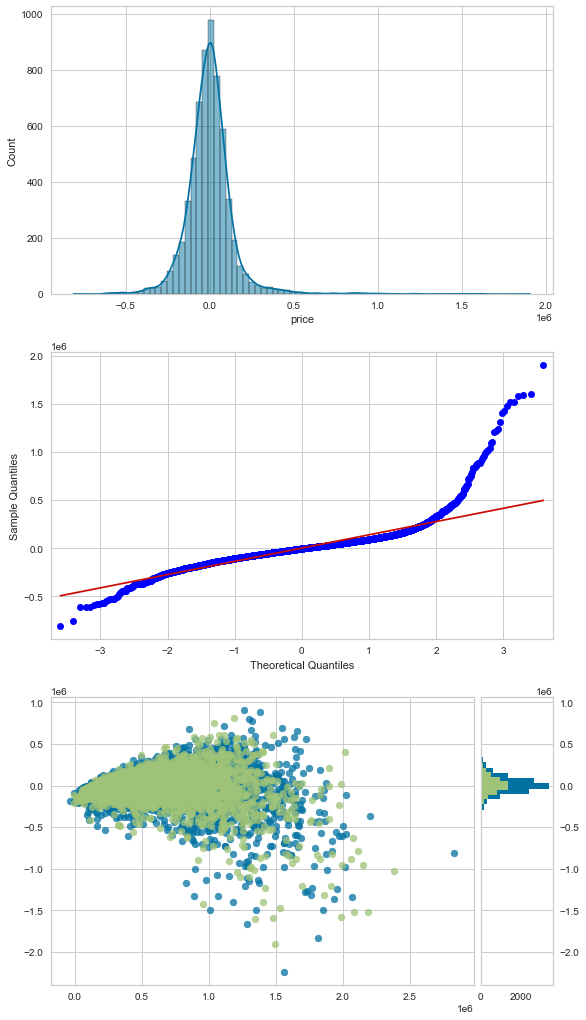

R2_train: 0.797
R2_test: 0.798
Durbin-Watson: 1.964
Train Mean Squarred Error: 20770358772.916
Test Mean Squarred Error: 23647937607.713
Test RMSE: 153778.859


In [73]:
res_plots(mlr_5, X_train_scaled_ord, X_test_scaled_ord, y_train, y_test)

In [74]:
# model with ohe and ordinal encoders and log price

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord
mlr_6 = LinearRegression()
mlr_6.fit(X_train_scaled_ord, y_train_log)
print(mlr_6.score(X_train_scaled_ord, y_train_log))
print(mlr_6.score(X_test_scaled_ord, y_test_log))

0.8562404255986689
0.8607408497187227


In [75]:
mlr_6_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord))
mlr_6_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     934.1
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:10   Log-Likelihood:                 2908.2
No. Observations:               12628   AIC:                            -5654.
Df Residuals:                   12547   BIC:                            -5051.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0439      0.002   7602.096      0.000      13.041      13.047
ohe__x0_Fair         -0.0081      0.002     -4.698      0.000      -0.012      -0.005
ohe__x0_Good          0.0175      0.002      9.385      0.000       0.014       0.021
ohe__x0_Poor         -0.0122      0.002     -7.072      0.000      -0.016      -0.009
ohe__x0_Very Good     0.0246      0.002     13.672      0.000       0.021       0.028
ohe__x1_98002        -0.0032      0.002     -1.505      0.132      -0.007       0.001
ohe__x1_98003         0.0044      0.002      1.947      0.052   -3.06e-05       0.009
ohe__x1_98004         0.1328      0.002     58.088      0.000       0.128       0.137
ohe__x1_98005         0.0741      0.002     35.067      0.000       0.070       0.078
ohe__x1_98006         0.0949      0.003     37.448      0.000       0.090       0.100
ohe__x1_98007         0.0530      0.002     26.885      0.000       0.049       0.057
ohe__x1_98008         0.0798      0.002     35.031      0.000       0.075       0.084
ohe__x1_98010         0.0160      0.002      8.372      0.000       0.012       0.020
ohe__x1_98011         0.0458      0.002     21.400      0.000       0.042       0.050
ohe__x1_98014         0.0264      0.002     13.535      0.000       0.023       0.030
ohe__x1_98019         0.0340      0.002     16.077      0.000       0.030       0.038
ohe__x1_98022         0.0082      0.002      3.787      0.000       0.004       0.012
ohe__x1_98023        -0.0011      0.003     -0.406      0.685      -0.006       0.004
ohe__x1_98024         0.0310      0.002     16.219      0.000       0.027       0.035
ohe__x1_98027         0.0686      0.002     28.413      0.000       0.064       0.073
ohe__x1_98028         0.0476      0.002     21.285      0.000       0.043       0.052
ohe__x1_98029         0.0780      0.002     33.326      0.000       0.073       0.083
ohe__x1_98030         0.0062      0.002      2.773      0.006       0.002       0.011
ohe__x1_98031         0.0098      0.002      4.442      0.000       0.005       0.014
ohe__x1_98032        -0.0017      0.002     -0.849      0.396      -0.006       0.002
ohe__x1_98033         0.1131      0.002     45.459      0.000       0.108       0.118
ohe__x1_98034         0.0894      0.003     33.945      0.000       0.084       0.095
ohe__x1_98038         0.0273      0.003     10.089      0.000       0.022       0.033
ohe__x1_98039         0.0563      0.002     30.967      0.000       0.053       0.060
ohe__x1_98040         0.0969      0.002     43.410      0.000       0.093       0.101
ohe__x1_98042         0.0111      0.003      4.167      0.000       0.006       0.016
ohe__x1_98045         0.0375      0.002     17.302      0.000       0.033       0.042
ohe__x1_98052         0.1090      0.003     40.314      0.000       0.104

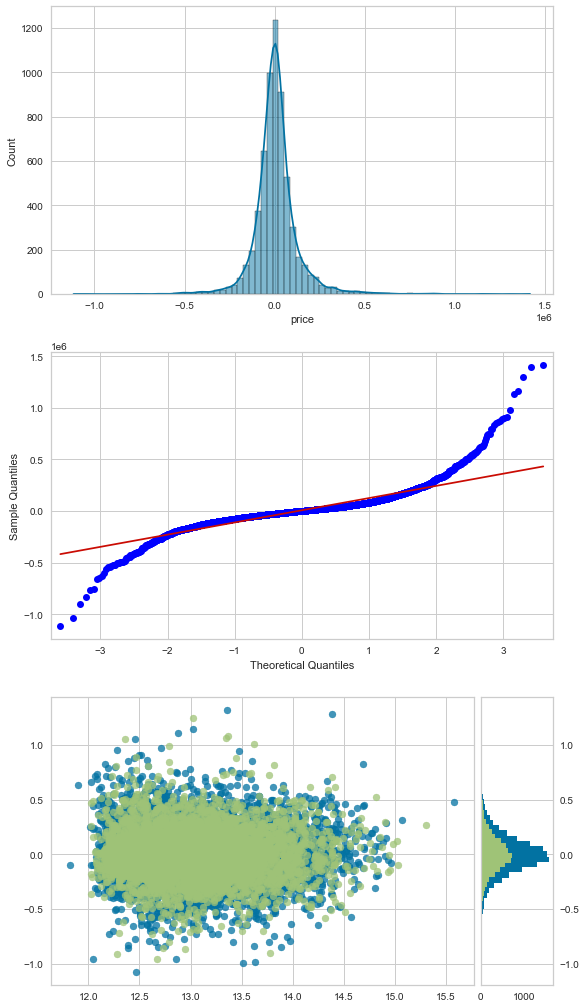

R2_train: 0.856
R2_test: 0.861
Durbin-Watson: 1.996
Train Mean Squarred Error: 16438933468.790
Test Mean Squarred Error: 16875160703.349
Test RMSE: 129904.429


In [76]:
res_plots_log(mlr_6, X_train_scaled_ord, X_test_scaled_ord, y_train_log, y_test_log)

In [77]:
# Make a new model to explore how each feature impacts the model
mlr_6_rfe = LinearRegression()

# Instantiate our RFE with that new model and how many features we want, first cutting features in half
rfe = RFE(mlr_6_rfe, n_features_to_select=40)

# Fit to our polynomial training data
rfe.fit(X_train_scaled_ord, y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [78]:
rfe_selectors = []

for col_name, support in dict(zip(X_train_scaled_ord.columns, rfe.support_)).items():
    if support == True:
        rfe_selectors.append(col_name)


In [79]:
# model with ohe and ordinal encoders and log price, but with specific variables that RFE selected

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord[rfe_selectors]
mlr_7 = LinearRegression()
mlr_7.fit(X_train_scaled_ord[rfe_selectors], y_train_log)
print(mlr_7.score(X_train_scaled_ord[rfe_selectors], y_train_log))
print(mlr_7.score(X_test_scaled_ord[rfe_selectors], y_test_log))

0.809432792927224
0.8239440679058158


In [80]:
mlr_7_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord[rfe_selectors]))
mlr_7_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:21   Log-Likelihood:                 1128.5
No. Observations:               12628   AIC:                            -2175.
Df Residuals:                   12587   BIC:                            -1870.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0439      0.002   6613.309      0.000      13.040      13.048
ohe__x1_98004     0.1078      0.002     53.563      0.000       0.104       0.112
ohe__x1_98005     0.0549      0.002     27.494      0.000       0.051       0.059
ohe__x1_98006     0.0653      0.002     32.063      0.000       0.061       0.069
ohe__x1_98007     0.0383      0.002     19.325      0.000       0.034       0.042
ohe__x1_98008     0.0562      0.002     28.229      0.000       0.052       0.060
ohe__x1_98027     0.0417      0.002     20.797      0.000       0.038       0.046
ohe__x1_98029     0.0551      0.002     27.573      0.000       0.051       0.059
ohe__x1_98033     0.0850      0.002     42.415      0.000       0.081       0.089
ohe__x1_98034     0.0582      0.002     29.068      0.000       0.054       0.062
ohe__x1_98039     0.0465      0.002     23.464      0.000       0.043       0.050
ohe__x1_98040     0.0745      0.002     36.933      0.000       0.071       0.078
ohe__x1_98052     0.0759      0.002     37.581      0.000       0.072       0.080
ohe__x1_98053     0.0545      0.002     27.000      0.000       0.051       0.059
ohe__x1_98072     0.0339      0.002     16.965      0.000       0.030       0.038
ohe__x1_98074     0.0541      0.002     26.765      0.000       0.050       0.058
ohe__x1_98075     0.0471      0.002     22.946      0.000       0.043       0.051
ohe__x1_98102     0.0546      0.002     27.609      0.000       0.051       0.059
ohe__x1_98103     0.1070      0.002     52.953      0.000       0.103       0.111
ohe__x1_98105     0.0815      0.002     41.013      0.000       0.078       0.085
ohe__x1_98107     0.0742      0.002     37.197      0.000       0.070       0.078
ohe__x1_98109     0.0564      0.002     28.512      0.000       0.053       0.060
ohe__x1_98112     0.0956      0.002     47.959      0.000       0.092       0.099
ohe__x1_98115     0.1039      0.002     51.646      0.000       0.100       0.108
ohe__x1_98116     0.0734      0.002     36.550      0.000       0.069       0.077
ohe__x1_98117     0.0996      0.002     49.407      0.000       0.096       0.104
ohe__x1_98118     0.0392      0.002     19.491      0.000       0.035       0.043
ohe__x1_98119     0.0785      0.002     39.497      0.000       0.075       0.082
ohe__x1_98122     0.0737      0.002     37.010      0.000       0.070       0.078
ohe__x1_98125     0.0486      0.002     24.305      0.000       0.045       0.053
ohe__x1_98126     0.0453      0.002     22.587      0.000       0.041       0.049
ohe__x1_98133     0.0414      0.002     20.622      0.000       0.037       0.045
ohe__x1_98136     0.0559      0.002     27.959      0.000       0.052       0.060
ohe__x1_98144     0.0583      0.002     29.200      0.000       0.054       0.062
ohe__x1_98155     0.0355      0.002     17.712   

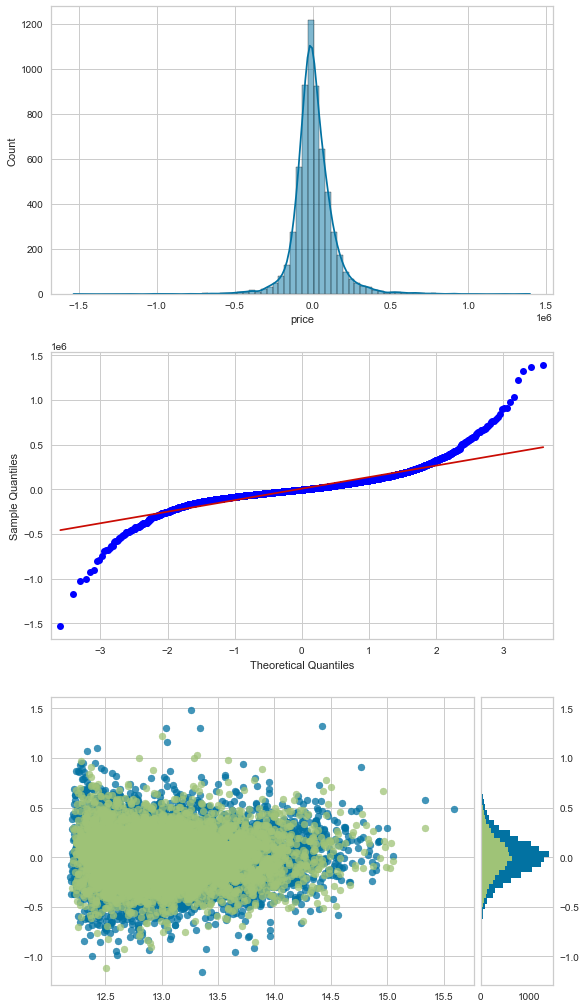

R2_train: 0.809
R2_test: 0.824
Durbin-Watson: 1.986
Train Mean Squarred Error: 19415972942.370
Test Mean Squarred Error: 19663344862.303
Test RMSE: 140226.049


In [81]:
res_plots_log(mlr_7, X_train_scaled_ord[rfe_selectors], X_test_scaled_ord[rfe_selectors], y_train_log, y_test_log)

In [82]:
# Make a new model to explore how each feature impacts the model
mlr_7_rfe = LinearRegression()

# Instantiate our RFE with that new model and how many features we want
rfe = RFE(mlr_7_rfe, n_features_to_select=10)

# Fit to our polynomial training data
rfe.fit(X_train_scaled_ord[rfe_selectors], y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [83]:
rfe.ranking_

array([ 1, 16, 13, 28, 15, 26, 18,  2, 17, 19,  6,  8, 20, 31, 21, 23, 10,
        1,  1,  4,  9,  1,  1,  7,  1, 29,  1,  5, 22, 25, 27, 14, 12, 30,
       24,  3,  1, 11,  1,  1])

In [84]:
dict(zip(X_train_scaled_ord[rfe_selectors].columns, rfe.ranking_))

{'ohe__x1_98004': 1,
 'ohe__x1_98005': 16,
 'ohe__x1_98006': 13,
 'ohe__x1_98007': 28,
 'ohe__x1_98008': 15,
 'ohe__x1_98027': 26,
 'ohe__x1_98029': 18,
 'ohe__x1_98033': 2,
 'ohe__x1_98034': 17,
 'ohe__x1_98039': 19,
 'ohe__x1_98040': 6,
 'ohe__x1_98052': 8,
 'ohe__x1_98053': 20,
 'ohe__x1_98072': 31,
 'ohe__x1_98074': 21,
 'ohe__x1_98075': 23,
 'ohe__x1_98102': 10,
 'ohe__x1_98103': 1,
 'ohe__x1_98105': 1,
 'ohe__x1_98107': 4,
 'ohe__x1_98109': 9,
 'ohe__x1_98112': 1,
 'ohe__x1_98115': 1,
 'ohe__x1_98116': 7,
 'ohe__x1_98117': 1,
 'ohe__x1_98118': 29,
 'ohe__x1_98119': 1,
 'ohe__x1_98122': 5,
 'ohe__x1_98125': 22,
 'ohe__x1_98126': 25,
 'ohe__x1_98133': 27,
 'ohe__x1_98136': 14,
 'ohe__x1_98144': 12,
 'ohe__x1_98155': 30,
 'ohe__x1_98177': 24,
 'ohe__x1_98199': 3,
 'sqft_living': 1,
 'waterfront': 11,
 'view': 1,
 'sqft_living15': 1}

In [85]:
for col_name, support in dict(zip(X_train_scaled_ord[rfe_selectors].columns, rfe.support_)).items():
    if support == True:
        print(col_name)

ohe__x1_98004
ohe__x1_98103
ohe__x1_98105
ohe__x1_98112
ohe__x1_98115
ohe__x1_98117
ohe__x1_98119
sqft_living
view
sqft_living15


In [86]:
col_use = ['sqft_living','bedrooms','bathrooms','sqft_living15', 'basement','view', 'waterfront']
mlr_8_rfe = LinearRegression()

rfe = RFE(mlr_8_rfe, n_features_to_select=5)

rfe.fit(X_train_scaled_ord[col_use], y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [87]:
rfe_selectors = []

for col_name, support in dict(zip(X_train_scaled_ord[col_use].columns, rfe.support_)).items():
    if support == True:
        rfe_selectors.append(col_name)
rfe_selectors

['sqft_living', 'bedrooms', 'sqft_living15', 'view', 'waterfront']

In [88]:
# this tells us to drop bathrooms and basement 
# notice how in the sns plot above, bedrooms were the least linear. makes sense to drop it. 

In [89]:
X_train_scaled_ord = X_train_scaled_ord.drop(columns= ['bedrooms','basement'])
X_test_scaled_ord = X_test_scaled_ord.drop(columns= ['bedrooms','basement'])

In [90]:
# model with ohe and ordinal encoders and log price, but with specific variables that RFE selected, 
# and with dropped numerical 'bedrooms' and 'basement' columns 

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

col_use = X_train_scaled_ord
mlr_9 = LinearRegression()
mlr_9.fit(X_train_scaled_ord, y_train_log)
print(mlr_9.score(X_train_scaled_ord, y_train_log))
print(mlr_9.score(X_test_scaled_ord, y_test_log))

0.8542525457886809
0.8591964810421125


In [91]:
mlr_9_ols = sm.OLS(y_train_log, sm.add_constant(X_train_scaled_ord))
mlr_9_ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     943.0
Date:                Thu, 31 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:13:25   Log-Likelihood:                 2821.5
No. Observations:               12628   AIC:                            -5485.
Df Residuals:                   12549   BIC:                            -4897.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0439      0.002   7550.676      0.000      13.041      13.047
ohe__x0_Fair         -0.0086      0.002     -4.917      0.000      -0.012      -0.005
ohe__x0_Good          0.0143      0.002      7.685      0.000       0.011       0.018
ohe__x0_Poor         -0.0121      0.002     -6.939      0.000      -0.015      -0.009
ohe__x0_Very Good     0.0222      0.002     12.353      0.000       0.019       0.026
ohe__x1_98002        -0.0029      0.002     -1.369      0.171      -0.007       0.001
ohe__x1_98003         0.0041      0.002      1.781      0.075      -0.000       0.009
ohe__x1_98004         0.1325      0.002     57.593      0.000       0.128       0.137
ohe__x1_98005         0.0735      0.002     34.577      0.000       0.069       0.078
ohe__x1_98006         0.0941      0.003     36.885      0.000       0.089       0.099
ohe__x1_98007         0.0529      0.002     26.629      0.000       0.049       0.057
ohe__x1_98008         0.0784      0.002     34.245      0.000       0.074       0.083
ohe__x1_98010         0.0165      0.002      8.580      0.000       0.013       0.020
ohe__x1_98011         0.0455      0.002     21.093      0.000       0.041       0.050
ohe__x1_98014         0.0275      0.002     14.061      0.000       0.024       0.031
ohe__x1_98019         0.0346      0.002     16.236      0.000       0.030       0.039
ohe__x1_98022         0.0091      0.002      4.194      0.000       0.005       0.013
ohe__x1_98023        -0.0021      0.003     -0.814      0.416      -0.007       0.003
ohe__x1_98024         0.0317      0.002     16.475      0.000       0.028       0.035
ohe__x1_98027         0.0680      0.002     28.007      0.000       0.063       0.073
ohe__x1_98028         0.0467      0.002     20.764      0.000       0.042       0.051
ohe__x1_98029         0.0791      0.002     33.555      0.000       0.074       0.084
ohe__x1_98030         0.0062      0.002      2.742      0.006       0.002       0.011
ohe__x1_98031         0.0095      0.002      4.272      0.000       0.005       0.014
ohe__x1_98032        -0.0023      0.002     -1.150      0.250      -0.006       0.002
ohe__x1_98033         0.1130      0.003     45.120      0.000       0.108       0.118
ohe__x1_98034         0.0882      0.003     33.286      0.000       0.083       0.093
ohe__x1_98038         0.0286      0.003     10.537      0.000       0.023       0.034
ohe__x1_98039         0.0562      0.002     30.740      0.000       0.053       0.060
ohe__x1_98040         0.0962      0.002     42.850      0.000       0.092       0.101
ohe__x1_98042         0.0116      0.003      4.339      0.000       0.006       0.017
ohe__x1_98045         0.0382      0.002     17.499      0.000       0.034       0.042
ohe__x1_98052         0.1089      0.003     40.002      0.000       0.104

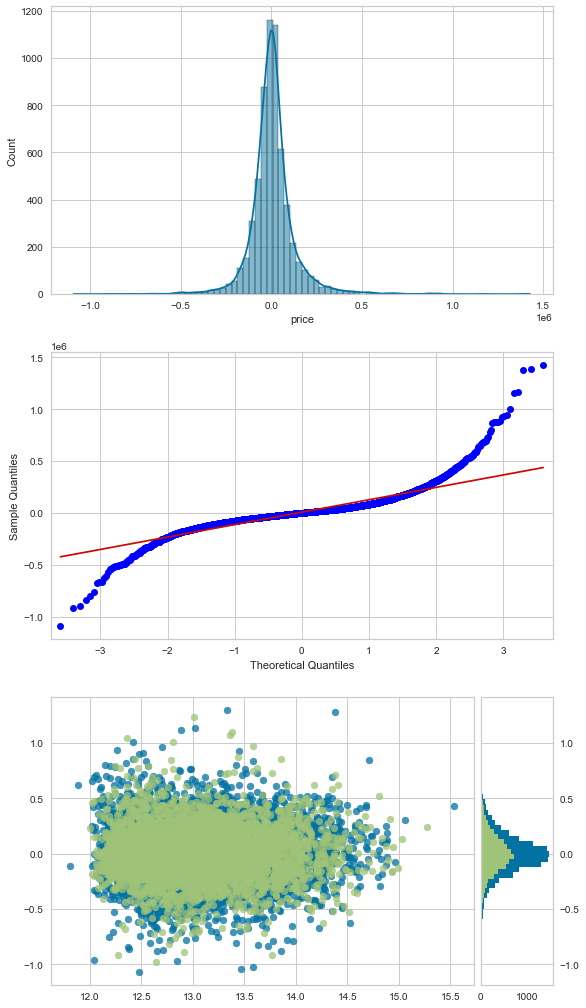

R2_train: 0.854
R2_test: 0.859
Durbin-Watson: 1.994
Train Mean Squarred Error: 16699804004.188
Test Mean Squarred Error: 17374020168.330
Test RMSE: 131810.546


In [92]:
res_plots_log(mlr_9, X_train_scaled_ord, X_test_scaled_ord, y_train_log, y_test_log)

In [93]:
# now compare RMSE of this model and the one before numbericals were dropped

In [94]:
# want a higher R2 in general. want difference between R2_train and R2_test to be neglible. 
# want RMSE to be lower, less dollars you're off by. Compare this RMSE to RMSE of other models. 

In [95]:
# you can violate assumptions and still have a decent predictive model. 
#If you violate assumptions, your inferencial model is less robust your coefficient interpretation. 

In [96]:
# talk about specific coefficients/variables and how they affect price per 1 unit increase
#if these are the features we pick, talk about how a 1 unite increase in blank will yield an x increase in price
#use coefficients

In [98]:
# add scatter plot with concated df to compare variables to price for visualization. 
#how much does an incrase in blank incrase price?

In [99]:
#in conclusion, how does model offer competitive edge? include in slide. be more specific in recommendations 